In [ ]:
import re
def read_data(file_path):
    with open(file_path, 'r') as file:
        data = file.read()
    
    seeds_pattern = re.compile(r'seeds: \[(.*?)\]')
    gen_pattern = re.compile(r'gen: (\d+),\s*best of gen fitness: ([-\d.]+),\s*best of gen size: (\d+)')
    stats_pattern = re.compile(
        r'Average fitness: ([-\d.]+),\s*Standard deviation: ([-\d.]+),\s*Minimum fitness: ([-\d.]+),\s*Maximum fitness: ([-\d.]+),\s*Best scores: (\d+/\d+),\s*Best scores: ([\d.]+/[\d.]+),\s*Median fitness: ([-\d.]+),\s*Variance: ([-\d.]+)'
    )
    
    seeds = seeds_pattern.findall(data)
    gens = gen_pattern.findall(data)
    stats = stats_pattern.findall(data)

    seeds = [list(map(int, s.split(','))) for s in seeds]
    gens = [(int(g[0]), float(g[1]), int(g[2])) for g in gens]
    stats = [
        (float(s[0]), float(s[1]), float(s[2]), float(s[3]), s[4], s[5], float(s[6]), float(s[7])) 
        for s in stats
    ]
    
    return seeds, gens, stats

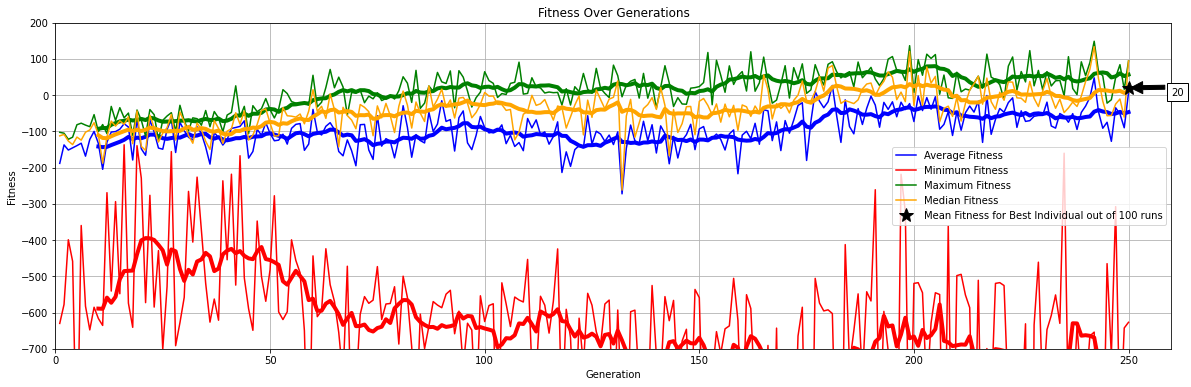

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_data(generations, avg_fitness, min_fitness, max_fitness, median_fitness):
    avg_fitness_ma = pd.Series(avg_fitness).rolling(window=10).mean()
    min_fitness_ma = pd.Series(min_fitness).rolling(window=10).mean()
    max_fitness_ma = pd.Series(max_fitness).rolling(window=10).mean()
    median_fitness_ma = pd.Series(median_fitness).rolling(window=10).mean()
    
    plt.figure(figsize=(20, 6))

    plt.plot(generations, avg_fitness, label='Average Fitness', color='blue')
    plt.plot(generations, avg_fitness_ma, color='blue', linestyle='solid', linewidth=4)

    plt.plot(generations, min_fitness, label='Minimum Fitness', color='red')
    plt.plot(generations, min_fitness_ma, color='red', linestyle='solid', linewidth=4)

    plt.plot(generations, max_fitness, label='Maximum Fitness', color='green')
    plt.plot(generations, max_fitness_ma, color='green', linestyle='solid', linewidth=4)

    plt.plot(generations, median_fitness, label='Median Fitness', color='orange')
    plt.plot(generations, median_fitness_ma, color='orange', linestyle='solid', linewidth=4)

    # Highlight the best individual at generation 250
    best_gen = 250
    best_fitness = 20
    plt.plot(best_gen, best_fitness, 'k*', markersize=15, label='Mean Fitness for Best Individual out of 100 runs')
    plt.annotate(f'{best_fitness}', 
                 xy=(best_gen, best_fitness), 
                 xytext=(best_gen + 10, best_fitness - 20),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 bbox=dict(facecolor='white', edgecolor='black'))

    plt.ylim(-700, 200)
    plt.xlim(0, 260)
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.title('Fitness Over Generations')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    file_path = 'data2.txt' 
    seeds, gens, stats = read_data(file_path)
    
    generations = [gen[0] for gen in gens]
    avg_fitness = [stat[0] for stat in stats]
    min_fitness = [stat[2] for stat in stats]
    max_fitness = [stat[3] for stat in stats]
    median_fitness = [stat[6] for stat in stats]

    plot_data(generations, avg_fitness, min_fitness, max_fitness, median_fitness)

if __name__ == "__main__":
    main()
